# Project: Wrangling and Analyze Data

In [124]:
# importing the libraries needed for this project
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [125]:
# read the tweet data into a dataframe
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [126]:
#using respose to send an http request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [127]:
# saving the data into a local file
with open('image_predictions.tsv','w') as file:
    file.write(response.text)

In [128]:
# read the file into a pandas dataframe
df_image = pd.read_csv('image_predictions.tsv',sep='\t')
df_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [129]:
client = tweepy.Client(bearer_token='')

In [130]:
# getting data from the twitter api iusing tweepy
consumer_key = ''
consumer_secret = ''
bearer_token = ''
access_token = ''
access_secret = ''

In [131]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [132]:
# list the twitter ids from df_twitter
tweet_ids = df_twitter['tweet_id'].values
print(len(tweet_ids))

2356


In [133]:
# get data from the twitter api
count = 0

#create an empty list for the tweets
list_json = []

# create an empty dictionary to catch errors
errors_dict = {}

start = timer()

# loop throught tweet_ids to get data for all the tweets in the list
for tweet_id in tweet_ids:
    count += 1
    print(f'{count} : {tweet_id}')
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')._json
        print('success')
        favorites = tweet['favorite_count']
        rt = tweet['retweet_count']
        follower_count = tweet['user']['followers_count']
        time = tweet['created_at']
        list_json.append({'tweet_id':tweet_id,
                          'favorites': favorites,
                          'retweets': rt,
                          'follower_count':follower_count,
                          'created_at':time
                         })
    except Exception as e:
            print('error')
            errors_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(errors_dict)     

1 : 892420643555336193
success
2 : 892177421306343426
success
3 : 891815181378084864
success
4 : 891689557279858688
success
5 : 891327558926688256
success
6 : 891087950875897856
success
7 : 890971913173991426
success
8 : 890729181411237888
success
9 : 890609185150312448
success
10 : 890240255349198849
success
11 : 890006608113172480
success
12 : 889880896479866881
success
13 : 889665388333682689
success
14 : 889638837579907072
success
15 : 889531135344209921
success
16 : 889278841981685760
success
17 : 888917238123831296
success
18 : 888804989199671297
success
19 : 888554962724278272
success
20 : 888202515573088257
error
21 : 888078434458587136
success
22 : 887705289381826560
success
23 : 887517139158093824
success
24 : 887473957103951883
success
25 : 887343217045368832
success
26 : 887101392804085760
success
27 : 886983233522544640
success
28 : 886736880519319552
success
29 : 886680336477933568
success
30 : 886366144734445568
success
31 : 886267009285017600
success
32 : 88625838415188

success
254 : 844704788403113984
error
255 : 844580511645339650
success
256 : 844223788422217728
success
257 : 843981021012017153
success
258 : 843856843873095681
success
259 : 843604394117681152
success
260 : 843235543001513987
success
261 : 842892208864923648
error
262 : 842846295480000512
success
263 : 842765311967449089
success
264 : 842535590457499648
success
265 : 842163532590374912
success
266 : 842115215311396866
success
267 : 841833993020538882
success
268 : 841680585030541313
success
269 : 841439858740625411
success
270 : 841320156043304961
success
271 : 841314665196081154
success
272 : 841077006473256960
success
273 : 840761248237133825
success
274 : 840728873075638272
success
275 : 840698636975636481
success
276 : 840696689258311684
success
277 : 840632337062862849
success
278 : 840370681858686976
success
279 : 840268004936019968
success
280 : 839990271299457024
success
281 : 839549326359670784
success
282 : 839290600511926273
success
283 : 839239871831150596
success
284 : 

success
503 : 813081950185472002
success
504 : 813066809284972545
success
505 : 813051746834595840
success
506 : 812781120811126785
success
507 : 812747805718642688
error
508 : 812709060537683968
success
509 : 812503143955202048
success
510 : 812466873996607488
success
511 : 812372279581671427
success
512 : 811985624773361665
success
513 : 811744202451197953
success
514 : 811647686436880384
success
515 : 811627233043480576
success
516 : 811386762094317568
success
517 : 810984652412424192
success
518 : 810896069567610880
success
519 : 810657578271330305
success
520 : 810284430598270976
success
521 : 810254108431155201
success
522 : 809920764300447744
success
523 : 809808892968534016
success
524 : 809448704142938112
success
525 : 809220051211603969
success
526 : 809084759137812480
success
527 : 808838249661788160
success
528 : 808733504066486276
success
529 : 808501579447930884
success
530 : 808344865868283904
success
531 : 808134635716833280
success
532 : 808106460588765185
success
533 

error
752 : 779056095788752897
success
753 : 778990705243029504
success
754 : 778774459159379968
success
755 : 778764940568104960
success
756 : 778748913645780993
success
757 : 778650543019483137
success
758 : 778624900596654080
success
759 : 778408200802557953
success
760 : 778396591732486144
success
761 : 778383385161035776
success
762 : 778286810187399168
success
763 : 778039087836069888
success
764 : 778027034220126208
success
765 : 777953400541634568
success
766 : 777885040357281792
success
767 : 777684233540206592
success
768 : 777641927919427584
success
769 : 777621514455814149
success
770 : 777189768882946048
success
771 : 776819012571455488
success
772 : 776813020089548800
success
773 : 776477788987613185
success
774 : 776249906839351296
success
775 : 776218204058357768
success
776 : 776201521193218049
success
777 : 776113305656188928
success
778 : 776088319444877312
success
779 : 775898661951791106
success
780 : 775842724423557120
success
781 : 775733305207554048
success
782 

Rate limit reached. Sleeping for: 550


success
902 : 758474966123810816
success
903 : 758467244762497024
success
904 : 758405701903519748
success
905 : 758355060040593408
success
906 : 758099635764359168
success
907 : 758041019896193024
success
908 : 757741869644341248
success
909 : 757729163776290825
success
910 : 757725642876129280
success
911 : 757611664640446465
success
912 : 757597904299253760
success
913 : 757596066325864448
success
914 : 757400162377592832
success
915 : 757393109802180609
success
916 : 757354760399941633
success
917 : 756998049151549440
success
918 : 756939218950160384
success
919 : 756651752796094464
success
920 : 756526248105566208
success
921 : 756303284449767430
success
922 : 756288534030475264
success
923 : 756275833623502848
success
924 : 755955933503782912
success
925 : 755206590534418437
success
926 : 755110668769038337
success
927 : 754874841593970688
success
928 : 754856583969079297
success
929 : 754747087846248448
success
930 : 754482103782404096
success
931 : 754449512966619136
success
93

success
1146 : 727175381690781696
success
1147 : 727155742655025152
success
1148 : 726935089318363137
success
1149 : 726887082820554753
success
1150 : 726828223124897792
success
1151 : 726224900189511680
success
1152 : 725842289046749185
success
1153 : 725786712245440512
success
1154 : 725729321944506368
success
1155 : 725458796924002305
success
1156 : 724983749226668032
success
1157 : 724771698126512129
success
1158 : 724405726123311104
success
1159 : 724049859469295616
success
1160 : 724046343203856385
success
1161 : 724004602748780546
success
1162 : 723912936180330496
success
1163 : 723688335806480385
success
1164 : 723673163800948736
success
1165 : 723179728551723008
success
1166 : 722974582966214656
success
1167 : 722613351520608256
success
1168 : 721503162398597120
success
1169 : 721001180231503872
success
1170 : 720785406564900865
success
1171 : 720775346191278080
success
1172 : 720415127506415616
success
1173 : 720389942216527872
success
1174 : 720340705894408192
success
1175 :

success
1387 : 700518061187723268
success
1388 : 700505138482569216
success
1389 : 700462010979500032
success
1390 : 700167517596164096
success
1391 : 700151421916807169
success
1392 : 700143752053182464
success
1393 : 700062718104104960
success
1394 : 700029284593901568
success
1395 : 700002074055016451
success
1396 : 699801817392291840
success
1397 : 699788877217865730
success
1398 : 699779630832685056
success
1399 : 699775878809702401
success
1400 : 699691744225525762
success
1401 : 699446877801091073
success
1402 : 699434518667751424
success
1403 : 699423671849451520
success
1404 : 699413908797464576
success
1405 : 699370870310113280
success
1406 : 699323444782047232
success
1407 : 699088579889332224
success
1408 : 699079609774645248
success
1409 : 699072405256409088
success
1410 : 699060279947165696
success
1411 : 699036661657767936
success
1412 : 698989035503689728
success
1413 : 698953797952008193
success
1414 : 698907974262222848
success
1415 : 698710712454139905
success
1416 :

success
1628 : 684594889858887680
success
1629 : 684588130326986752
success
1630 : 684567543613382656
success
1631 : 684538444857667585
success
1632 : 684481074559381504
success
1633 : 684460069371654144
success
1634 : 684241637099323392
success
1635 : 684225744407494656
success
1636 : 684222868335505415
success
1637 : 684200372118904832
success
1638 : 684195085588783105
success
1639 : 684188786104872960
success
1640 : 684177701129875456
success
1641 : 684147889187209216
success
1642 : 684122891630342144
success
1643 : 684097758874210310
success
1644 : 683857920510050305
success
1645 : 683852578183077888
success
1646 : 683849932751646720
success
1647 : 683834909291606017
success
1648 : 683828599284170753
success
1649 : 683773439333797890
success
1650 : 683742671509258241
success
1651 : 683515932363329536
success
1652 : 683498322573824003
success
1653 : 683481228088049664
success
1654 : 683462770029932544
success
1655 : 683449695444799489
success
1656 : 683391852557561860
success
1657 :

Rate limit reached. Sleeping for: 576


success
1802 : 676957860086095872
success
1803 : 676949632774234114
success
1804 : 676948236477857792
success
1805 : 676946864479084545
success
1806 : 676942428000112642
success
1807 : 676936541936185344
success
1808 : 676916996760600576
success
1809 : 676897532954456065
success
1810 : 676864501615042560
success
1811 : 676821958043033607
success
1812 : 676819651066732545
success
1813 : 676811746707918848
success
1814 : 676776431406465024
success
1815 : 676617503762681856
success
1816 : 676613908052996102
success
1817 : 676606785097199616
success
1818 : 676603393314578432
success
1819 : 676593408224403456
success
1820 : 676590572941893632
success
1821 : 676588346097852417
success
1822 : 676582956622721024
success
1823 : 676575501977128964
success
1824 : 676533798876651520
success
1825 : 676496375194980353
success
1826 : 676470639084101634
success
1827 : 676440007570247681
success
1828 : 676430933382295552
success
1829 : 676263575653122048
success
1830 : 676237365392908289
success
1831 :

success
2043 : 671538301157904385
success
2044 : 671536543010570240
success
2045 : 671533943490011136
success
2046 : 671528761649688577
success
2047 : 671520732782923777
success
2048 : 671518598289059840
success
2049 : 671511350426865664
success
2050 : 671504605491109889
success
2051 : 671497587707535361
success
2052 : 671488513339211776
success
2053 : 671486386088865792
success
2054 : 671485057807351808
success
2055 : 671390180817915904
success
2056 : 671362598324076544
success
2057 : 671357843010908160
success
2058 : 671355857343524864
success
2059 : 671347597085433856
success
2060 : 671186162933985280
success
2061 : 671182547775299584
success
2062 : 671166507850801152
success
2063 : 671163268581498880
success
2064 : 671159727754231808
success
2065 : 671154572044468225
success
2066 : 671151324042559489
success
2067 : 671147085991960577
success
2068 : 671141549288370177
success
2069 : 671138694582165504
success
2070 : 671134062904504320
success
2071 : 671122204919246848
success
2072 :

success
2284 : 667200525029539841
success
2285 : 667192066997374976
success
2286 : 667188689915760640
success
2287 : 667182792070062081
success
2288 : 667177989038297088
success
2289 : 667176164155375616
success
2290 : 667174963120574464
success
2291 : 667171260800061440
success
2292 : 667165590075940865
success
2293 : 667160273090932737
success
2294 : 667152164079423490
success
2295 : 667138269671505920
success
2296 : 667119796878725120
success
2297 : 667090893657276420
success
2298 : 667073648344346624
success
2299 : 667070482143944705
success
2300 : 667065535570550784
success
2301 : 667062181243039745
success
2302 : 667044094246576128
success
2303 : 667012601033924608
success
2304 : 666996132027977728
success
2305 : 666983947667116034
success
2306 : 666837028449972224
success
2307 : 666835007768551424
success
2308 : 666826780179869698
success
2309 : 666817836334096384
success
2310 : 666804364988780544
success
2311 : 666786068205871104
success
2312 : 666781792255496192
success
2313 :

In [134]:
with open("tweet_json.txt","w") as file:
    for i in list_json:
        file.write(str(i))

In [135]:
df_tweet_json = pd.DataFrame(list_json)
df_tweet_json.head()

tweet_id  favorites  retweets  follower_count  \
0  892420643555336193      33860      7024         9267580   
1  892177421306343426      29360      5304         9267580   
2  891815181378084864      22084      3488         9267580   
3  891689557279858688      36985      7236         9267580   
4  891327558926688256      35361      7775         9267580   

                       created_at  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [136]:
#visually accessing the data sets
df_twitter

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

In [137]:
df_image

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
45    666786068205871104   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
50    666837028449972224   
51    666983947667116034   
52    666996132027977728   
53    667012601033924608   
54    667044094246576128   
55    667062181243039745   
56    667065535570550784   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
69    667188689915760640   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
73    667369227918143488   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
77    667437278097252352   
78    667443425659232256   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
93    667549055577362432   
94    667550882905632768   
95    667550904950915073   
96    667724302356258817   
97    667728196545200128   
98    667766675769573376   
99    667773195014021121   
100   667782464991965184   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
106   667866724293877760   
107   667873844930215936   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
112   667911425562669056   
113   667915453470232577   
114   667924896115245057   
115   667937095915278337   
116   668113020489474048   
117   668142349051129856   
118   668154635664932864   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
123   668226093875376128   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
130   668291999406125056   
131   668297328638447616   
132   668466899341221888   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
140   668544745690562560   
141   668567822092664832   
142   668614

In [138]:
df_tweet_json

tweet_id  favorites  retweets  follower_count  \
0     892420643555336193      33860      7024         9267580   
1     892177421306343426      29360      5304         9267580   
2     891815181378084864      22084      3488         9267580   
3     891689557279858688      36985      7236         9267580   
4     891327558926688256      35361      7775         9267580   
5     891087950875897856      17835      2603         9267580   
6     890971913173991426      10381      1672         9267580   
7     890729181411237888      56909     15784         9267580   
8     890609185150312448      24553      3628         9267580   
9     890240255349198849      27990      6108         9267580   
10    890006608113172480      27072      6157         9267580   
11    889880896479866881      24600      4175         9267580   
12    889665388333682689      42095      8359         9267580   
13    889638837579907072      23713      3720         9267580   
14    889531135344209921      13361      1885         9267580   
15    889278841981685760      22152      4449         9267580   
16    888917238123831296      25667      3769         9267580   
17    888804989199671297      22493      3544         9267580   
18    888554962724278272      17334      2882         9268013   
19    888078434458587136      19171      2901         9267580   
20    887705289381826560      26662      4542         9267580   
21    887517139158093824      40778      9864         9267580   
22    887473957103951883      60253     15052         9267580   
23    887343217045368832      29618      8821         9267580   
24    887101392804085760      27010      4999         9267580   
25    886983233522544640      30425      6328         9267580   
26    886736880519319552      10506      2635         9267580   
27    886680336477933568      19768      3745         9267580   
28    886366144734445568      18569      2634         9267580   
29    886267009285017600        105         4         9267580   
30    886258384151887873      24552      5298         9267580   
31    886054160059072513          0        93         9267580   
32    885984800019947520      28643      5624         9267580   
33    885528943205470208      31631      5339         9267580   
34    885518971528720385      18033      3114         9267580   
35    885311592912609280          0     15458         9267580   
36    885167619883638784      19280      3673         9267580   
37    884925521741709313      67388     15051         9267580   
38    884876753390489601      24424      4678         9267580   
39    884562892145688576      21351      3918         9267580   
40    884441805382717440      23889      4800         9267580   
41    884247878851493888      63343     16942         9268052   
42    884162670584377345      17966      2510         9267580   
43    883838122936631299      19201      2867         9267580   
44    883482846933004288      40260      8282         9267580   
45    883360690899218434      19969      3089         9267580   
46    883117836046086144      32554      5544         9267580   
47    882992080364220416      21005      3250         9267580   
48    882762694511734784      24832      4106         9267580   
49    882627270321602560      24633      5076         9267580   
50    882268110199369728      39237      9651         9267580   
51    882045870035918850      25768      4092         9267580   
52    881906580714921986      21466      2858         9267580   
53    881666595344535552      44595      8972         9267580   
54    881633300179243008        113         8         9268052   
55    881536004380872706      43494     13427         9267580   
56    881268444196462592      20504      4501         9267580   
57    880935762899988482      15071      2337         9267580   
58    880872448815771648      18728      3206         9267580   
59    880465832366813184      25048      5224         9267580   
60    880221127280381952      23688      3475      

In [139]:
# increasing the maximum displaay length
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None) 

In [140]:
# assessing the data programatically using pandas methods
display(df_twitter.info())
display(df_image.info())
display(df_tweet_json.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   favorites       2327 non-null   int64 
 2   retweets        2327 non-null   int64 
 3   follower_count  2327 non-null   int64 
 4   created_at      2327 non-null   object
dtypes: int64(4), object(1)
memory usage: 91.0+ KB


None

In [141]:
# checking for wrong values in the name column
df_twitter[df_twitter['name'] == 'the']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1527  690360449368465409                    NaN                  NaN   
1603  685943807276412928                    NaN                  NaN   
1797  677269281705472000                    NaN                  NaN   
1815  676613908052996102                    NaN                  NaN   
2037  671561002136281088                    NaN                  NaN   
2212  668587383441514497                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   

                      timestamp  \
1527  2016-01-22 02:28:52 +0000   
1603  2016-01-09 21:58:42 +0000   
1797  2015-12-16 23:29:14 +0000   
1815  2015-12-15 04:05:01 +0000   
2037  2015-12-01 05:26:34 +0000   
2212  2015-11-23 00:30:28 +0000   
2345  2015-11-16 01:22:45 +0000   
2346  2015-11-16 01:01:59 +0000   

                                                                                  source  \
1527  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1603  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1797  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1815  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2037  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2212                     <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
2345  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2346  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                  text  \
1527                                 Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx   
1603      This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn   
1797                                                  This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb   
1815                                                        This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF   
2037  This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU   
2212            Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3   
2345                                       This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK   
2346           Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p   

      retweeted_status_id  retweeted_status_user_id  \
1527                  NaN                       NaN   
1603                  NaN                       NaN   
1797                  NaN                       NaN   
1815                  NaN                       NaN   
2037                  NaN                       NaN   
2212                  NaN                       NaN   
2345                  NaN                       NaN   
2346                  NaN                       NaN   

     retweeted_status_timestamp  \
1527                        NaN   
1603                        NaN   
1797                        NaN   
1815                        NaN   
2037                        NaN   
2212                        NaN   
2345                        NaN   
2346                        NaN   

                       

In [142]:
# checking the names column in the df_twitter table
df_twitter['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
Daisy               7
Toby                7
an                  7
Bailey              7
Buddy               7
Bella               6
Rusty               6
Leo                 6
Stanley             6
Koda                6
Jack                6
Jax                 6
Scout               6
Milo                6
Oscar               6
Dave                6
Bentley             5
George              5
Chester             5
Larry               5
Alfie               5
Oakley              5
Sunny               5
Gus                 5
very                5
Finn                5
Louis               5
Sammy               5
Phil                5
one                 4
Maddie              4
Gerald              4
Dexter    

In [143]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [144]:
# looking at a sample of the text column in the dt_twitter table
df_twitter.text.sample(10)

1980                                                                     This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1
1206                                         This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10  https://t.co/wJX74TSgzP
152     This is Dave. He passed the h*ck out. It's barely the afternoon on a Thursday, Dave. Get it together. Still 11/10 would boop mid-snooze https://t.co/Eme9Uar6v2
1989                       This is Jerry. He's a Timbuk Slytherin. Eats his pizza from the side first. Crushed that cup with his bare paws 9/10 https://t.co/fvxHL6cRRs
1928                          Herd of wild dogs here. Not sure what they're trying to do. No real goals in life. 3/10 find your purpose puppers https://t.co/t5ih0VrK02
1744                                                                                                 This is Rubio. He has too much skin. 11/10 https://t.co/NLO

In [145]:
# looking at the rating numerator and denominator coumns in the df_twitter dataframe
display(df_twitter['rating_numerator'].value_counts())
display(df_twitter['rating_denominator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

### Quality issues

1. We only want original ratings not retweets that have images

2. The ratings coulmn was not extracted correctly

3. Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns of the df_ twitter table.

4. The case of the values in the p1, p2, p3 column is not consistent across the df_image dataset.

5. timestamp column on the df_twitter table should be of type datetime

6. Missing values in the name coulmn disguised as "None", "a", "an" and "the"

7. tweet_id column on all tables should be of type object

8. Replace "None" in doggo,floofer,pupper,puppo of the df_twitter table with nan

9. The source column and other unnecessary or repeated coulmns on the df_twitter table needs to be dropped



### Tidiness issues

1. 'doggo','floofer','pupper','puppo' should be put into one column

2. Presence of http links in the text column

2.  The three tables should be merged to make one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [300]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_tweet_json_clean = df_tweet_json.copy()

### Issue #1:

#### Define: We only want original ratings not retweets that have images

#### Code

In [301]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [302]:
# removing retweeets from the dataset to keep only the original tweets
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]

#### Test

In [303]:
# checking if rows with retweeted_status_id have been dropped
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:

#### Define: The ratings coulmn was not extracted correctly

In [304]:
# checking to see if the ratings_numerator values that were not extracted correctly
df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

C:\Users\Abimbola.Balogun\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id  \
45    883482846933004288   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  
45                   5  
695                 75  
763                 27  
1689                 5  
1712                26

In [305]:
# channging the data type of the ratings_numerator and ratings_denominator values to float
df_twitter_clean['rating_numerator'] = df_twitter_clean['rating_numerator'].astype('float')
df_twitter_clean['rating_denominator'] = df_twitter_clean['rating_denominator'].astype('float')

# updating the rating_numerator values
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 883482846933004288,'rating_numerator'] = 13.5
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 786709082849828864,'rating_numerator'] = 9.75
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 778027034220126208,'rating_numerator'] = 11.27
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 681340665377193984,'rating_numerator'] = 9.5
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 680494726643068929,'rating_numerator'] = 11.26

#### Test

In [306]:
df_twitter_clean[df_twitter_clean['tweet_id'] == 680494726643068929]['rating_numerator']

1712    11.26
Name: rating_numerator, dtype: float64

### Issue #3:

#### Define: Missing values in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns of the df_ twitter table.

#### Code

In [307]:
#checking for the number and percentage of missing values in these columns 
display(df_twitter_clean.isna().sum())
display(df_twitter_clean.isna().sum()/len(df_twitter) * 100)

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

tweet_id                       0.000000
in_reply_to_status_id         89.006791
in_reply_to_user_id           89.006791
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.461800
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have missing values in over 90% of the rows, these columns will be dropped. expanded_urls column will also be dropped.

In [308]:
# dropping the columns
drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
       'expanded_urls']

df_twitter_clean.drop(drop, axis= 1,inplace=True)
display(df_twitter_clean)

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
30    886267009285017600  2017-07-15 16:51:35 +0000   
31    886258384151887873  2017-07-15 16:17:19 +0000   
33    885984800019947520  2017-07-14 22:10:11 +0000   
34    885528943205470208  2017-07-13 15:58:47 +0000   
35    885518971528720385  2017-07-13 15:19:09 +0000   
37    885167619883638784  2017-07-12 16:03:00 +0000   
38    884925521741709313  2017-07-12 00:01:00 +0000   
39    884876753390489601  2017-07-11 20:47:12 +0000   
40    884562892145688576  2017-07-11 00:00:02 +0000   
41    884441805382717440  2017-07-10 15:58:53 +0000   
42    884247878851493888  2017-07-10 03:08:17 +0000   
43    884162670584377345  2017-07-09 21:29:42 +0000   
44    883838122936631299  2017-07-09 00:00:04 +0000   
45    883482846933004288  2017-07-08 00:28:19 +0000   
46    883360690899218434  2017-07-07 16:22:55 +0000   
47    883117836046086144  2017-07-07 00:17:54 +0000   
48    882992080364220416  2017-07-06 15:58:11 +0000   
49    882762694511734784  2017-07-06 00:46:41 +0000   
50    882627270321602560  2017-07-05 15:48:34 +0000   
51    882268110199369728  2017-07-04 16:01:23 +0000   
52    882045870035918850  2017-07-04 01:18:17 +0000   
53    881906580714921986  2017-07-03 16:04:48 +0000   
54    881666595344535552  2017-07-03 00:11:11 +0000   
55    881633300179243008  2017-07-02 21:58:53 +0000   
56    881536004380872706  2017-07-02 15:32:16 +0000   
57    881268444196462592  2017-07-01 21:49:04 +0000   
58    880935762899988482  2017-06-30 23:47:07 +0000   
59    880872448815771648  2017-06-30 19:35:32 +0000   
60    880465832366813184  2017-06-29 16:39:47 +0000   
61    880221127280381952  2017-06-29 00:27:25 +0000   
62    880095782870896641  2017-06-28 16:09:20 +0000   
63    879862464715927552  2017-06-28 00:42:13 +0000   
64    879674319642796034  2017-06-27 12:14:36 +0000   
65    879492040517615616  2017-06-27 00:10:17 +0000   
66    879415818425184262  2017-06-26 19:07:24 +0000   
67    879376492567855104  2017-06-26 16:31:08 +0000   
69    879050749262655488  2017-06-25 18:56:45 +0000   
70    879008229531029506  2017-06-25 16:07:47 +0000   
71    878776093423087618  2017-06-25 00:45:22 +0000   
72    878604707211726852  2017-06-24 13:24:20 +0000   
75    878281511006478336  2017-06-23 16:00:04 +0000   
76    878057613040115712  2017-06-23 01:10:23 +0000   
77    877736472329191424  2017-06-22 03:54:17 +0000   
7

#### Test

In [309]:
# checking for missing values in the df_twitter_clean dataset
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   rating_numerator    2175 non-null   float64
 5   rating_denominator  2175 non-null   float64
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 203.9+ KB


### Issue #4:

#### Define: The case of the values in the p1, p2, p3 column is not consistent across the df_image dataset.

#### Code

In [310]:
# converting all the values in these columns to lowercase
cols = ['p1','p2','p3']
for col in cols:
    df_image_clean[col] = df_image_clean[col].str.lower()

#### Test

In [311]:
# checking if the case is uniform now
df_image_clean[['p1','p2','p3']].sample(10)

p1                           p2                  p3
1147             polecat                         mink        newfoundland
1215            sea_lion                          tub        hippopotamus
1000         tennis_ball  german_short-haired_pointer  labrador_retriever
1346              kuvasz             golden_retriever          white_wolf
1993            cardigan                     pembroke              kelpie
1087            pembroke                     cardigan       toilet_tissue
989           toy_poodle             miniature_poodle               teddy
974            wild_boar                          hog             warthog
1905              prison                   dishwasher                file
2041  labrador_retriever                    seat_belt                 pug

### Issue #5:

#### Define: timestamp column on the df_twitter table should be of type datetime

#### Code

In [312]:
# coverting the timestamp coulmn to type datetime
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)

#### Test

In [313]:
# checking the datatypes on columns in the dataframe
df_twitter_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #6:

#### Define: Missing values in the name coulmn disguised as "None", "a" , "an" and "the" in the df_twitter table

#### Code

In [314]:
# replacing 'None', 'an' and 'a' with Nan
df_twitter_clean.name.replace({'None':np.nan, 'a':np.nan, 'an':np.nan, 'the':np.nan},inplace=True)

#### Test

In [315]:
# checking the values count of names in the dataset
df_twitter_clean.name.value_counts()

Lucy              11
Charlie           11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Lola               8
Winston            8
Daisy              7
Toby               7
Bailey             6
Bella              6
Stanley            6
Jax                6
Koda               6
Oscar              6
Bo                 6
Chester            5
Leo                5
Dave               5
Bentley            5
Rusty              5
Louis              5
Milo               5
Scout              5
Buddy              5
Chip               4
Clarence           4
Dexter             4
Winnie             4
Gus                4
George             4
Boomer             4
Alfie              4
Larry              4
Archie             4
Bear               4
Duke               4
Cassie             4
Reggie             4
Scooter            4
Jerry              4
Maggie             4
Jack               4
Sophie             4
one                4
Derek        

### Issue #7:

#### Define: tweet_id column on all tables should be of type object

#### Code

In [316]:
# converting the tweet_id to the object date type
dataframes = [df_twitter_clean, df_image_clean, df_tweet_json_clean]

for df in dataframes:
    df.tweet_id =  df.tweet_id.astype('object')

#### Test

In [317]:
# checking the datatypes of the columns in the dateframes
for df in dataframes:
    display(df.dtypes)

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

tweet_id          object
favorites          int64
retweets           int64
follower_count     int64
created_at        object
dtype: object

### Issue #8

#### Define: The source column and other unnecessary or repeated coulmns on the df_twitter table needs to be dropped

#### Code:

In [318]:
# checking for repeated columns in the dataframes
for df in dataframes:
    display(df.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Index(['tweet_id', 'favorites', 'retweets', 'follower_count', 'created_at'], dtype='object')

I will be dropping the source column because it is unnecessary for this analysis and the created_at column because a timestamp column is already present in another table

In [319]:
# droping the source column from the df_twitter_clean table and the created_at column from the df_tweet_json_clean table
df_twitter_clean.drop('source',axis=1,inplace=True)
df_tweet_json_clean.drop('created_at', axis=1,inplace=True)

#### Test

In [320]:
# checking for repeated columns in the dataframes
for df in dataframes:
    display(df.columns)

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Index(['tweet_id', 'favorites', 'retweets', 'follower_count'], dtype='object')

### Resolving Tidyness Issues

### Issue #9

#### Define: 'doggo','floofer','pupper','puppo' should be put into one column

In [321]:
# checking the column names 
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [322]:
# combiming the three columns to make one column
df_twitter_clean['dog_class'] = df_twitter_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
# removing the "None" from the new column
df_twitter_clean['dog_class'] = df_twitter_clean['dog_class'].str.replace(r'(None,)', repl='')
df_twitter_clean['dog_class'] = df_twitter_clean['dog_class'].str.replace(r'(,None)', repl='')
# dropping the other columns
df_twitter_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

<ipython-input-322-6ceefe522f4f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitter_clean['dog_class'] = df_twitter_clean['dog_class'].str.replace(r'(None,)', repl='')
<ipython-input-322-6ceefe522f4f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitter_clean['dog_class'] = df_twitter_clean['dog_class'].str.replace(r'(,None)', repl='')


In [323]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                1426 non-null   object             
 6   dog_class           2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 135.9+ KB


In [324]:
df_twitter_clean.dog_class.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'puppo,doggo',
       'floofer,doggo', 'pupper,doggo'], dtype=object)

#### Test

In [325]:
df_twitter_clean.dog_class.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
pupper,doggo       10
floofer             9
puppo,doggo         1
floofer,doggo       1
Name: dog_class, dtype: int64

### Issue #10

#### Define: Presence of http link in text column

* https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### Code

In [326]:
df_twitter_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_class                          object
dtype: object

In [327]:
def remove_link(row):
    pos = row.find('http')
    # if there is no link keep the row
    if pos == -1:
        row = row
    else:
        # remove the link and the whitespace before it
        row = row[:pos - 1]
    return row

# apply the function on the text column
df_twitter_clean.text = df_twitter_clean.text.apply(remove_link)

#### Test

In [329]:
df_twitter_clean.text.head()

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Name: text, dtype: object

### Issue #11

#### Define: the three datasets should be merged to make one table

#### Code

In [330]:
# merge the three datasets to make one table
df_twitter_meged = pd.merge(left= df_twitter_clean, right = df_tweet_json_clean, how = 'left', on = 'tweet_id')
df_twitter_meged = pd.merge(left= df_twitter_meged, right = df_image_clean, how = 'left', on = 'tweet_id')

#### Test

In [333]:
df_twitter_meged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                1426 non-null   object             
 6   dog_class           2175 non-null   object             
 7   favorites           2167 non-null   float64            
 8   retweets            2167 non-null   float64            
 9   follower_count      2167 non-null   float64            
 10  jpg_url             1994 non-null   object             
 11  img_num             1994 non-null   float64            
 12  p1                  1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [334]:
df_twitter_meged.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [335]:
# read the saved file into a pandas dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [336]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                1426 non-null   object 
 6   dog_class           2175 non-null   object 
 7   favorites           2167 non-null   float64
 8   retweets            2167 non-null   float64
 9   follower_count      2167 non-null   float64
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   float64
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   object 
 15  p2                  1994 non-null   object 
 16  p2_con

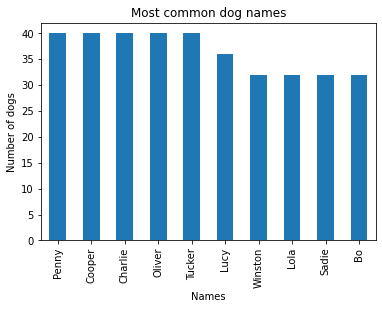

In [56]:
#ploting the top 10 dog names
top_dog_names = twitter_archive_master.name.value_counts().head(10)
df_top_dog_names = pd.DataFrame(top_dog_names)
top_dog_names.plot.bar()
plt.xlabel("Names")
plt.ylabel("Number of dogs")
plt.title("Most common dog names")
plt.show()

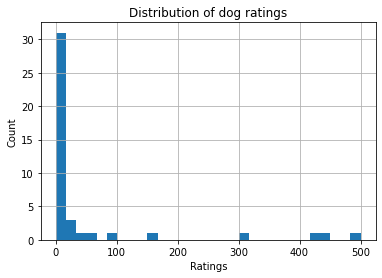

In [339]:
# using a histogram to check the distribition of the ratings
twitter_archive_master.rating_numerator.value_counts().hist(bins=30)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of dog ratings")
plt.show()

In [340]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

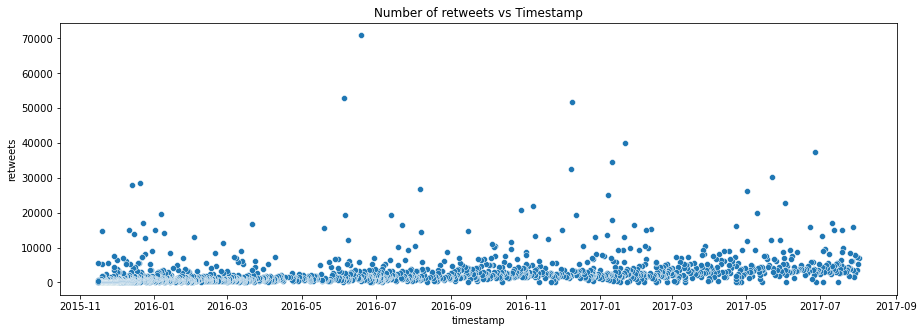

In [341]:
# using a scatter plot to check if there is a corolation between timestamp and retweets
fig = plt.figure(figsize=(15,5))
sns.scatterplot(x='timestamp',y='retweets',data=twitter_archive_master)
plt.title("Number of retweets vs Timestamp")
plt.show()

### Insights:

1. Oliver, Penny, Cooper and Charlie are the most common dog names

2. There does not appear to be a corolation between the time a tweet was posted and the num ber of retweets

3. Most of the ratings fall between 0 to 25, with a number or outliers